# Linear ODE Example

The fulll model is the driven by the SDE
$$dX_t = AXdt + dB_t$$
around a fixed point (eigen vector of $A$.

This system has the exact solution of $$X_t = e^{-At}\left(X_0 + \int_0^t e^{As}\;dB_s\right)$$
I will use the for the model Euler Maruyama
$$X_n = h(I+A)X_{n-1} + \sqrt{h}B_{n-1}$$

In [1]:
using PyPlot

include("..\\..\\Server_scripts\\Model_Reduction_Dev.jl")

vector_wiener_filter_fft

In [2]:
A = [-0.01 0; 0 -.9]
d = size(A,1)

T_end = 10000
dt = 2^-10
Δt = 2^-5

T = 0:dt:T_end
N = 0:Δt:T_end

Tsteps = floor(Int,T_end/dt)
Nsteps = floor(Int,T_end/Δt)
gap = floor(Int, Δt/dt)

σ = [.2 0; 0 .2]

dW = randn(d,Tsteps)
ΔW = zeros(d,Nsteps)
for i = 1:Nsteps
    ΔW[:,i] = sum(dW[:,gap*(i-1)+1:gap*i],dims = 2)
end

W = cumsum([zeros(d) dW], dims = 2)
WW = cumsum([zeros(d) ΔW],dims = 2)

# plot(T, W')
# plot(N, WW')

Xo = [100; 6000]

# Euler-Maruyama
X = zeros(d,Nsteps+1); X[:,1] = Xo

for i = 2:Nsteps+1
    X[:,i] = Δt*(I+A)*X[:,i-1] + sqrt(Δt)*σ*ΔW[:,i-1]
end
X = X[:,floor(Int,Nsteps/2):Nsteps]

2×160001 Array{Float64,2}:
 -0.0354738   0.0601511  -0.0447699  …  -0.0215445  -0.0916284  -0.338107
  0.0545464  -0.216213    0.0492577      0.0794011   0.0300561  -0.172242

In [26]:
# Analysis Seires
lags = 0:100
A1 = my_crosscor(X[1,:],X[1,:],lags)

101-element Array{Complex{Float64},1}:
                    1.0 + 0.0im
    0.02905812539626033 + 0.0im
  0.0043485446815875765 + 0.0im
  0.0015582463450209845 + 0.0im
   0.002998437317997463 + 0.0im
   0.003312878109065056 + 0.0im
   -0.00399893900128332 + 0.0im
   0.002291884295063765 + 0.0im
 -0.0009554512221434344 + 0.0im
  -0.005529795140604791 + 0.0im
   0.002685279337429494 + 0.0im
  0.0031391181578095608 + 0.0im
 -0.0028075070375897767 + 0.0im
                        ⋮
  0.0057986178454564365 + 0.0im
 -0.0031986896436861094 + 0.0im
  0.0007004497994611615 + 0.0im
   7.391022600927748e-5 + 0.0im
 -0.0031828360588856556 + 0.0im
 -0.0003022053242286332 + 0.0im
  0.0012996496934301182 + 0.0im
 -0.0026390951772620975 + 0.0im
   0.002165315335570788 + 0.0im
  0.0036403820231237305 + 0.0im
  -0.004035164739527855 + 0.0im
 -0.0011082827981115624 + 0.0im

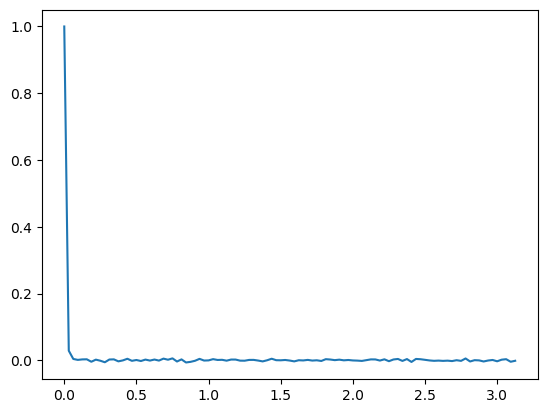

C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001145808>

In [27]:
plot(lags*Δt,A1)

In [47]:
Psi(x) = x

@time h_wf = get_wf(X,Psi,M_out = 2000)

  4.903267 seconds (16.70 M allocations: 1.282 GiB, 6.34% gc time)


2×2×2000 Array{Float64,3}:
[:, :, 1] =
 -4.02275e-5  0.00163224
 -0.00157139  6.83722e-5

[:, :, 2] =
 0.999989    -3.37467e-5
 1.80363e-5   0.999761

[:, :, 3] =
 -0.000203571  -0.00151001
  0.00159633    3.28683e-5

...

[:, :, 1998] =
 -4.64354e-7  4.81909e-7
  5.00422e-7  3.00548e-7

[:, :, 1999] =
 -3.69951e-7  -1.54791e-7
 -1.7654e-7   -2.47921e-7

[:, :, 2000] =
 -4.41151e-8  2.35147e-7
  2.30503e-7  1.57443e-6

In [48]:
M_out = size(h_wf,3)

2000

In [30]:
Δt*(I + A)

2×2 Array{Float64,2}:
 0.0309375  0.0
 0.0        0.003125

In [31]:
M_out

20

In [49]:
N = size(X,2)
X_hat = zeros(d,N); X_hat[:,1] = X[:,1] 
for i=2:N
    X_hat[:,i] = sum(h_wf[:,:,k]*X_hat[:,i-k] for k = 1:min(i-1,M_out),dims = 2)
end
X_hat

2×160001 Array{Float64,2}:
 0.189088   0.000339352  0.189079  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 0.212565  -0.000282599  0.212517     NaN  NaN  NaN  NaN  NaN  NaN  NaN

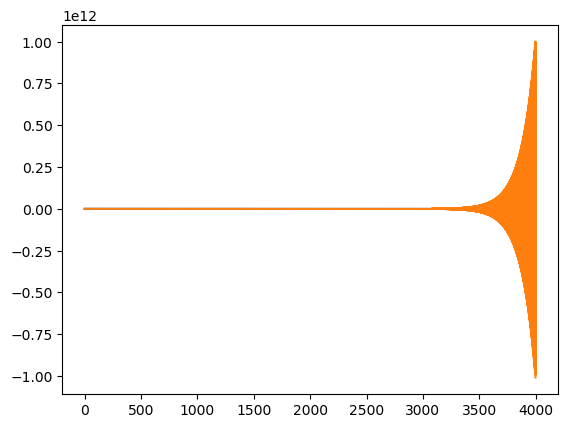

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002721548>
 PyObject <matplotlib.lines.Line2D object at 0x000000003B9E1948>

In [50]:
plot(X_hat[:,1:4000]')

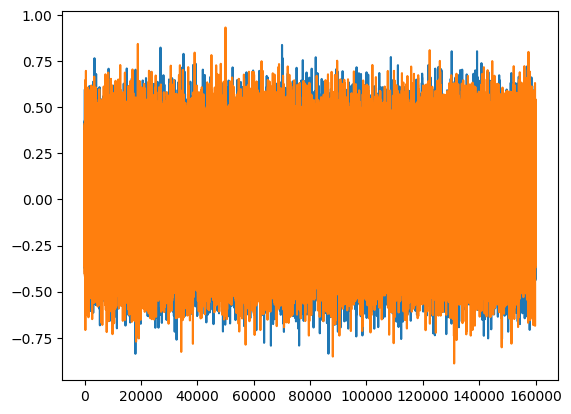

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000101AC48>
 PyObject <matplotlib.lines.Line2D object at 0x0000000001565788>

In [34]:
plot(X')